# MDP random walk
> Inspired to example 6.1 in Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press.
- A MDP with a single action `move` that moves the agent left with probability $\frac{1}{2}$ and right otherwise.
- The environment is a line numbered 1 to n from left to right.
- Reward is $0$ everywhere exept for far right where it is $1$.

![](../docs/imgs/random-walk.png)

In [1]:
from rl.mdp.random_walk import RandomWalk
from rl.mdp.policy import Policy

### Initialize RandomWalk

In [22]:
walk = RandomWalk(steps=15, gamma=1)

##### Create a simple policy to explore the RandomWalk
**Note**: Random Walk is a Reward model, thus it has a single possible action (i.e., 0)

In [23]:
from rl.mdp.model import MDP


class StaticPolicy(Policy):
    def __init__(self, mdp: MDP) -> None:
        super().__init__(mdp)
    def __getitem__(self, state: int) -> int:
        return 0
pi = StaticPolicy(mdp=walk)

In [24]:
print("Get state action", pi[4])
print("Generate step", pi.step(4))
print("Episode", pi.episode(max_iterations=4))

Get state action 0
Generate step (4, 0, 3, 0)
Episode [(7, 0, 0), (8, 0, 0), (7, 0, 0), (8, 0, 0)]


### MonteCarlo On-Policy Evaluation

In [25]:
import rl.mdp.montecarlo as mc

##### First Visit and Every Visit MC

In [27]:
import time

In [32]:
start = time.time()
V_first_visit = mc.montecarlo_value_function(policy=pi, model=walk, first_visit=True, max_iterations=1000)
print("First Visit MC computed in {:10.3f}s".format(time.time() - start))
start = time.time()
V_every_visit = mc.montecarlo_value_function(policy=pi, model=walk, first_visit=False, max_iterations=1000)
print("Every Visit MC computed in {:10.3f}s".format(time.time() - start))

First Visit MC computed in      1.511s
Every Visit MC computed in      1.475s


In [33]:
print(V_first_visit)
print(V_every_visit)

[       nan 0.07109005 0.14285714 0.20754717 0.27137546 0.33181818
 0.412      0.4852768  0.5560054  0.62709285 0.71034483 0.77882798
 0.8442623  0.9321267         nan]
[       nan 0.06063269 0.13523459 0.20894161 0.26924809 0.34549395
 0.43006324 0.49882943 0.55956972 0.64577518 0.74581725 0.82115869
 0.87670421 0.93570608        nan]


### Show

In [34]:
import matplotlib.pyplot as plt 
from matplotlib import style

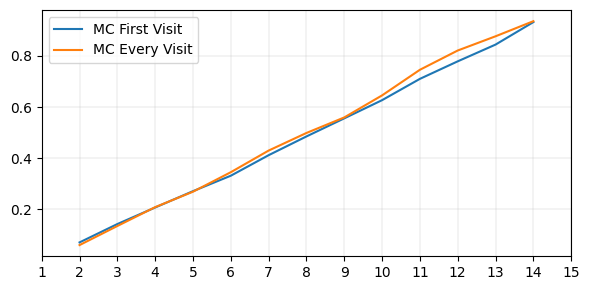

In [35]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(V_first_visit, linewidth=1.5, label="MC First Visit")
ax.plot(V_every_visit, linewidth=1.5, label="MC Every Visit")
ax.set_xticks(range(len(V_every_visit)))
ax.set_xticklabels(sorted(walk.states))
ax.grid(linewidth=.2)
ax.legend()
plt.tight_layout()
plt.show()